In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import christofides_p as cr
import graph_utils as gu
import time
import pandas as pd

In [27]:
size_array = []
time_array = []
num_tests = 20
for i in range(5,300,10):
    print(f"Running for i={i}")
    times = []

    for _ in range(num_tests):
        connected = False
        G = gu.generer_graphe_tsp(i)
        while not connected:
            number_of_edges = len(G.edges())
            k = (i-2)/number_of_edges
            len_blockages_less_i = False
            while not len_blockages_less_i:
                blockages = gu.generer_blockages(G, percentage=k)
                len_blockages_less_i = len(blockages) < (i - 1)
            G_verify = G.copy()
            G_verify.remove_edges_from(blockages)
            connected = nx.is_connected(G_verify)
        start = time.time()
        G_cr_tour = cr.canadian_traveller_cyclic_routing(G,blockages)
        end = time.time()
        time_array.append(end-start)
        size_array.append(i)
    print("-----------")


Running for i=5
-----------
Running for i=15
-----------
Running for i=25
-----------
Running for i=35
-----------
Running for i=45
-----------
Running for i=55
-----------
Running for i=65
-----------
Running for i=75
-----------
Running for i=85
-----------
Running for i=95
-----------
Running for i=105
-----------
Running for i=115
-----------
Running for i=125
-----------
Running for i=135
-----------
Running for i=145
-----------
Running for i=155
-----------
Running for i=165
-----------
Running for i=175
-----------
Running for i=185
-----------
Running for i=195
-----------
Running for i=205
-----------
Running for i=215
-----------
Running for i=225
-----------
Running for i=235
-----------
Running for i=245
-----------
Running for i=255
-----------
Running for i=265
-----------
Running for i=275
-----------
Running for i=285
-----------
Running for i=295
-----------


In [28]:
time_df = pd.DataFrame(data={'instance': size_array, 'seconds':time_array})
#time_df = time_df.groupby('instance').mean()
#time_df

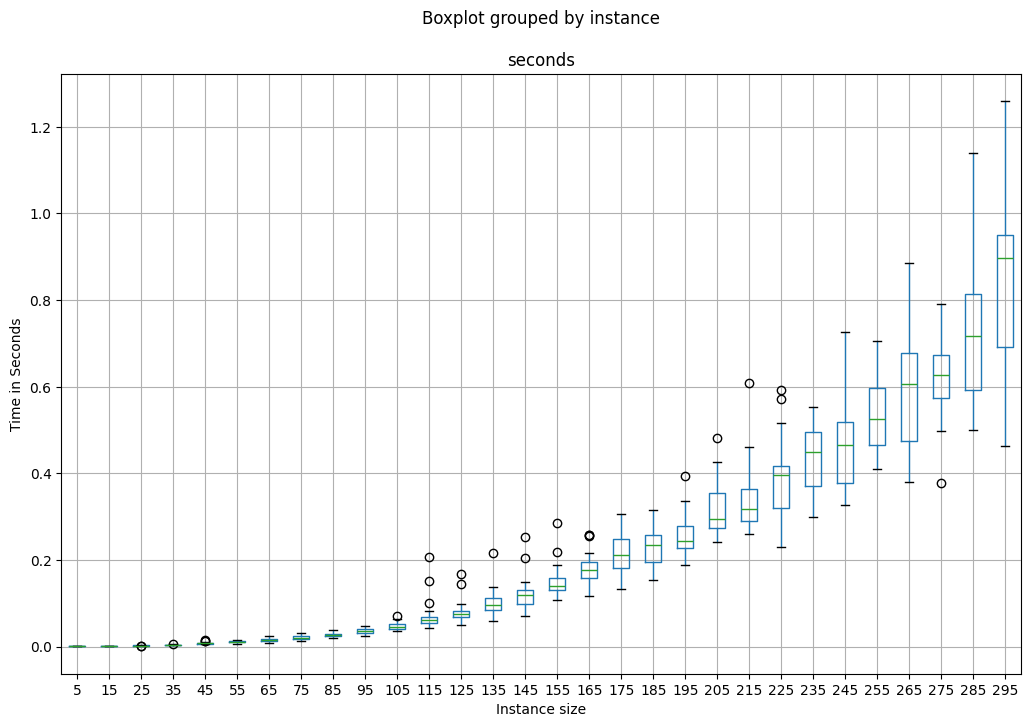

In [34]:
time_df.boxplot(by="instance",figsize=(12,8))
plt.xlabel('Instance size')
plt.ylabel('Time in Seconds')
plt.show()